# Password Strength Prediction Using NLP

***This notebook contains Data Loading, Exploration, and Feature Engineering.***

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data from sqlite3

In [2]:
import sqlite3
conn = sqlite3.connect(r'/Users/suyog/Desktop/Password_Strength/Data/password_data.sqlite')

df = pd.read_sql('SELECT * FROM Users', conn)

In [3]:
df.head()

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


## Baisc Data Structure

In [4]:
df.shape

(100000, 3)

In [5]:
df.columns

Index(['index', 'password', 'strength'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   index     100000 non-null  int64 
 1   password  100000 non-null  object
 2   strength  100000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


## Data Cleaning

#### Removing index from df

In [7]:
df.drop(['index'], axis=1, inplace=True)

#### Checking for duplicate values

In [8]:
df.duplicated().sum()

np.int64(0)

#### Checking for missing values

In [10]:
df.isnull().sum()

password    0
strength    0
dtype: int64

##### Checking for empty passwords

In [11]:
(df['password'].str.len() == 0).sum()

np.int64(0)

## Visualizing Class Distributions

In [12]:
df['strength'].value_counts()

strength
1    73883
0    13622
2    12495
Name: count, dtype: int64

In [16]:
# percentage of samples in each class (0, 1, 2)
df['strength'].value_counts(normalize=True) * 100

strength
1    73.883
0    13.622
2    12.495
Name: proportion, dtype: float64

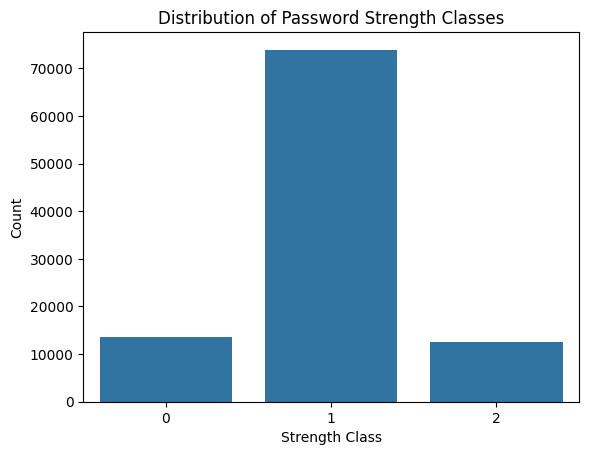

In [17]:
sns.countplot(data=df, x='strength')
plt.title('Distribution of Password Strength Classes')
plt.xlabel('Strength Class')
plt.ylabel('Count')
plt.show()

**It seems that medium passwords (class 1) are the most frequent in the dataset. Medium Passwords account for almost 74% of all passwords in the dataset.**

## Manual Passwords Exploration

In [18]:
# samples of weak passwords
df[df['strength'] == 0]['password'].sample(10)

69396     xylve1
64134    hvvpyd2
71902    matte63
74536    haslo22
41780    cholo14
33820    lobos34
77035    ra12mon
45608    6pnq4pd
38422     ekta12
27736    turut28
Name: password, dtype: object

In [19]:
# samples of medium passwords
df[df['strength'] == 1]['password'].sample(10)

88016      somya000341
43291    kranjska5gora
45564       gosang0603
82461       masterpro2
51374      tmnrdekw346
70351         tarea123
39171      hello123155
57819    diosdelalma22
82000        facebook2
44033    quicksilver09
Name: password, dtype: object

In [20]:
# samples of strong passwords
df[df['strength'] == 2]['password'].sample(10)

11037    MBkU7DTY4NAti6n8
64910     250komibumEveJu
63305    lQ8dg7jU4MA5Ku0o
9948     I3i6vKTE0MAUdYuS
23996    7ny53cDg5MAfIbHp
97337    2p11wFDg5OQfQA08
86198    Ox44pbTU5NgLyLOp
82401     01197536202m@rY
45598      11Elxy3bxiqp5c
77780    wTneFQjYwMgezGr1
Name: password, dtype: object

## Semantic Analysis

#### No of passwords with only numeric characters

In [25]:
df[df['password'].str.isnumeric()].shape

(26, 2)

#### No of passwords with only upper-case characters

In [26]:
df[df['password'].str.isupper()].shape

(1506, 2)

#### No of passwords with only lower-case characters

In [27]:
df[df['password'].str.islower()].shape

(86678, 2)

#### No of passwords with alpha-numeric characters

In [28]:
df[df['password'].str.isalnum()].shape

(97203, 2)

#### No of passwords with title-case characters

In [29]:
df[df['password'].str.istitle()].shape

(932, 2)

#### No of passwords with some special characters

In [30]:
# function: find_special_chars -> returns 1 if any character in a single password is special
import string

def find_special_chars(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [32]:
df[df['password'].apply(find_special_chars) == 1].shape

(2663, 2)

## Feature Engineering